In [1]:
#Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats
from sklearn.preprocessing import Imputer
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time
%matplotlib inline


C:\Users\prana\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importing data
data = pd.read_csv(r"C:\Users\prana\Desktop\Quarntine\AnalatyicsLab\Python\3._Case_Studies_Final_Projects_-_Python\FINAL PROJECTS\4. Segmentation of Credit Card Customers\CC_GENERAL.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape

(8950, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
#identifing null values
data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

In [8]:
#Replacing missing values with Median values
imputer_mean = Imputer(missing_values = 'NaN', strategy='median')
imputer_mean.fit(data[['MINIMUM_PAYMENTS']])
data['MINIMUM_PAYMENTS'] = imputer_mean.transform(data[['MINIMUM_PAYMENTS']])

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
data.isnull().sum().sort_values(ascending=False)

CREDIT_LIMIT                        1
TENURE                              0
PURCHASES_FREQUENCY                 0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
ONEOFF_PURCHASES_FREQUENCY          0
PRC_FULL_PAYMENT                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
CUST_ID                             0
dtype: int64

In [10]:
data.isnull().sum().sort_values(ascending=False)

CREDIT_LIMIT                        1
TENURE                              0
PURCHASES_FREQUENCY                 0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
ONEOFF_PURCHASES_FREQUENCY          0
PRC_FULL_PAYMENT                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
CUST_ID                             0
dtype: int64

In [11]:
# Deriving New KPI
# 1. Monthly average purchase and cash advance amount

# Monthly_avg_purchase¶


data['Monthly_avg_purchase']=data['PURCHASES']/data['TENURE']

In [12]:
data['Monthly_cash_advance']=data['CASH_ADVANCE']/data['TENURE']

In [13]:
data['Limit_Usage']=data['BALANCE']/data['CREDIT_LIMIT']

In [14]:
data.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]


,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [15]:
def purchase(data):
    if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0):
         return 'oneof'
    if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0):
        return 'Installment purchases'
    if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0):
        return 'both'

In [16]:
data['purchase_type']=data.apply(purchase,axis=1)

In [17]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Limit_Usage,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,Installment purchases
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,none
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,oneof
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,0.222223,oneof
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,oneof
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,6,1000.0,325.594462,48.886365,0.500000,6,48.520000,0.000000,0.028494,Installment purchases
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,6,1000.0,275.861322,312.343947,0.000000,6,50.000000,0.000000,0.019183,Installment purchases
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,5,1000.0,81.270775,82.418369,0.250000,6,24.066667,0.000000,0.023399,Installment purchases
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,0,500.0,52.549959,55.755628,0.250000,6,0.000000,6.093130,0.026915,none


In [18]:
#outliers ----->  log transformation.
data_log=data.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))


In [19]:
data_log.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,6.161637,2.013303,0.000000,4.861995,6.773521,7.628099,9.854515
BALANCE_FREQUENCY,8950.0,0.619940,0.148590,0.000000,0.635989,0.693147,0.693147,0.693147
PURCHASES,8950.0,4.899647,2.916872,0.000000,3.704627,5.892417,7.013133,10.800403
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.000000,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.000000,0.000000,4.499810,6.151961,10.021315
CASH_ADVANCE,8950.0,3.319086,3.566298,0.000000,0.000000,0.000000,7.016449,10.760839
PURCHASES_FREQUENCY,8950.0,0.361268,0.277317,0.000000,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158699,0.216672,0.000000,0.000000,0.080042,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270072,0.281852,0.000000,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113512,0.156716,0.000000,0.000000,0.000000,0.200671,0.916291


In [20]:
# creating Dummies for categorical variable
pd.get_dummies(data['purchase_type']).head()


,Installment purchases,both,none,oneof
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [21]:
data=pd.concat([data,pd.get_dummies(data['purchase_type'])],axis=1)

In [22]:
l=['purchase_type']

In [23]:
data=data.drop(l,axis=1)
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_avg_purchase                0
Monthly_cash_advance                0
Limit_Usage                         1
Installment purchases               0
both                                0
none                                0
oneof                               0
dtype: int64

In [24]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)
data['Limit_Usage'].fillna(data['Limit_Usage'].median(),inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [27]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_avg_purchase                0
Monthly_cash_advance                0
Limit_Usage                         0
Installment purchases               0
both                                0
none                                0
oneof                               0
dtype: int64

In [28]:
#standardizing

In [30]:
data.drop('CUST_ID',axis=1,inplace=True)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std=pd.DataFrame(scaler.fit_transform(data))

In [35]:
for i in range(len(data.columns)):
    data_std.rename(columns={i:data.columns[i]},inplace=True)

In [36]:
data_std

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Limit_Usage,Installment purchases,both,none,oneof
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,...,-0.302400,-0.525551,0.360680,-0.433384,-0.460727,-0.893082,1.720516,-0.670193,-0.543690,-0.514625
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,...,0.097500,0.234227,0.360680,-0.477428,2.319396,0.175987,-0.581221,-0.670193,1.839282,-0.514625
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,...,-0.093293,-0.525551,0.360680,-0.120468,-0.460727,-0.144299,-0.581221,-0.670193,-0.543690,1.943162
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,...,-0.228307,-0.525551,0.360680,0.214636,-0.371929,-0.427772,-0.581221,-0.670193,-0.543690,1.943162
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,...,-0.257266,-0.525551,0.360680,-0.470041,-0.460727,0.750647,-0.581221,-0.670193,-0.543690,1.943162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,...,-0.341250,1.183951,-4.122768,-0.208617,-0.460727,-0.924922,1.720516,-0.670193,-0.543690,-0.514625
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,...,-0.228307,-0.525551,-4.122768,-0.200418,-0.460727,-0.948814,1.720516,-0.670193,-0.543690,-0.514625
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,...,-0.326875,0.329200,-4.122768,-0.344094,-0.460727,-0.937996,1.720516,-0.670193,-0.543690,-0.514625
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,...,-0.338305,0.329200,-4.122768,-0.477428,-0.429177,-0.928972,-0.581221,-0.670193,1.839282,-0.514625


In [37]:
#Factor analysis

from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=10, random_state=0)
transformer.fit(data_std)


FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=10,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01)

In [39]:
components_df=pd.DataFrame(transformer.components_)
for i in range(len(data.columns)):
    components_df.rename(columns={i:data.columns[i]},inplace=True)
  

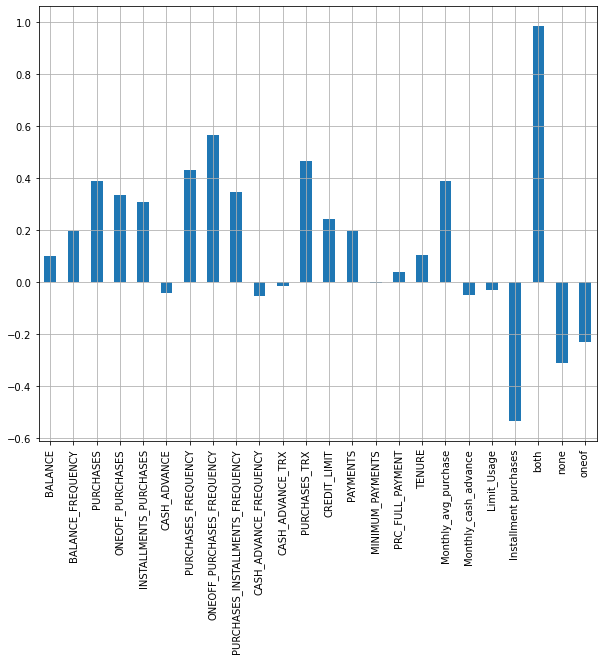

In [40]:
plt.figure(figsize=(10,8))
components_df.loc[0].plot(kind="bar")
plt.grid(True)

In [41]:
components_df.loc[0].sort_values()

Installment purchases              -0.535187
none                               -0.309679
oneof                              -0.229378
CASH_ADVANCE_FREQUENCY             -0.054583
Monthly_cash_advance               -0.047383
CASH_ADVANCE                       -0.042426
Limit_Usage                        -0.031233
CASH_ADVANCE_TRX                   -0.013984
MINIMUM_PAYMENTS                   -0.003277
PRC_FULL_PAYMENT                    0.039342
BALANCE                             0.102443
TENURE                              0.105092
PAYMENTS                            0.198057
BALANCE_FREQUENCY                   0.199034
CREDIT_LIMIT                        0.243806
INSTALLMENTS_PURCHASES              0.309310
ONEOFF_PURCHASES                    0.334688
PURCHASES_INSTALLMENTS_FREQUENCY    0.347817
Monthly_avg_purchase                0.390026
PURCHASES                           0.391008
PURCHASES_FREQUENCY                 0.430373
PURCHASES_TRX                       0.466362
ONEOFF_PUR

In [61]:
# Features to be included in our clustering model will be selected 
#based on components with max variance!

# PURCHASES
# ONEOFF_PURCHASES
# PURCHASES_TRX
# ONEOFF_PURCHASES_FREQUENCY
# INSTALLMENTS_PURCHASES
# PURCHASES_FREQUENCY
# PURCHASES_INSTALLMENTS_FREQUENCY
# CREDIT_LIMIT
# PAYMENTS
# CASH_ADVANCE_FREQUENCY
# oneof
# none
# installment purchases
# Monthly_avg_purchase

In [62]:
cluster_df = data[['PURCHASES','ONEOFF_PURCHASES','PURCHASES_TRX','ONEOFF_PURCHASES_FREQUENCY',
                 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CREDIT_LIMIT',
                 'PAYMENTS','CASH_ADVANCE_FREQUENCY','oneof','none','Installment purchases','Monthly_avg_purchase']]

In [63]:
cluster_df.head()

,PURCHASES,ONEOFF_PURCHASES,PURCHASES_TRX,ONEOFF_PURCHASES_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CREDIT_LIMIT,PAYMENTS,CASH_ADVANCE_FREQUENCY,oneof,none,Installment purchases,Monthly_avg_purchase
0,95.40,0.00,2,0.000000,95.4,0.166667,0.083333,1000.0,201.802084,0.000000,0,0,1,7.950000
1,0.00,0.00,0,0.000000,0.0,0.000000,0.000000,7000.0,4103.032597,0.250000,0,1,0,0.000000
2,773.17,773.17,12,1.000000,0.0,1.000000,0.000000,7500.0,622.066742,0.000000,1,0,0,64.430833
3,1499.00,1499.00,1,0.083333,0.0,0.083333,0.000000,7500.0,0.000000,0.083333,1,0,0,124.916667
4,16.00,16.00,1,0.083333,0.0,0.083333,0.000000,1200.0,678.334763,0.000000,1,0,0,1.333333


In [64]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time

In [65]:
distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster_df)
    distortions.append(kmeanModel.inertia_)


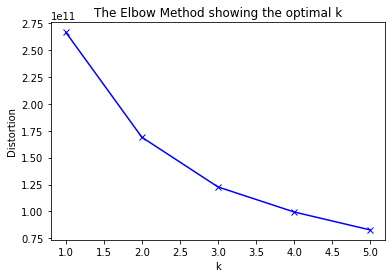

In [66]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [67]:
km = KMeans(init="random", n_clusters=2)
km.fit(cluster_df)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [68]:
labels=km.labels_

In [69]:
labels=labels.tolist()

In [70]:
labels=pd.Series(data=labels,index=range(len(labels)))

In [71]:
labels_x=list() #Extracting the various clusters formed
for i in range(10):
    labels_x.append(labels[labels.values==i])


In [72]:
#Cluster 1
cluster_df.iloc[labels_x[0].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
PURCHASES,6848.0,568.641741,787.321584,0.0,12.912500,276.260000,778.172500,7323.380000
ONEOFF_PURCHASES,6848.0,289.952756,573.569260,0.0,0.000000,0.000000,323.850000,5805.500000
PURCHASES_TRX,6848.0,10.334112,14.752134,0.0,1.000000,6.000000,13.000000,194.000000
ONEOFF_PURCHASES_FREQUENCY,6848.0,0.149206,0.249014,0.0,0.000000,0.000000,0.166667,1.000000
INSTALLMENTS_PURCHASES,6848.0,278.973547,475.620764,0.0,0.000000,63.165000,376.050000,5463.730000
PURCHASES_FREQUENCY,6848.0,0.455321,0.395012,0.0,0.083333,0.416667,0.902273,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,6848.0,0.342158,0.389961,0.0,0.000000,0.166667,0.750000,1.000000
CREDIT_LIMIT,6848.0,2903.508117,1757.414530,50.0,1500.000000,2500.000000,4000.000000,8000.000000
PAYMENTS,6848.0,1012.213779,1108.625956,0.0,312.438342,630.895898,1316.492550,12485.432890
CASH_ADVANCE_FREQUENCY,6848.0,0.121632,0.181518,0.0,0.000000,0.000000,0.166667,1.500000


In [73]:
cluster0_data=cluster_df.iloc[labels_x[0].index,:]


In [74]:
#Cluster 2

cluster_df.iloc[labels_x[1].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
PURCHASES,2102.0,2418.946061,3847.612706,0.0,225.322500,1210.630000,3244.085000,49039.570000
ONEOFF_PURCHASES,2102.0,1577.886775,3064.913399,0.0,0.000000,569.850000,1940.270000,40761.250000
PURCHASES_TRX,2102.0,28.965271,40.705630,0.0,3.000000,14.000000,38.000000,358.000000
ONEOFF_PURCHASES_FREQUENCY,2102.0,0.375944,0.371042,0.0,0.000000,0.250000,0.666667,1.000000
INSTALLMENTS_PURCHASES,2102.0,841.410357,1582.428722,0.0,0.000000,249.105000,1100.890000,22500.000000
PURCHASES_FREQUENCY,2102.0,0.604472,0.400812,0.0,0.166667,0.750000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,2102.0,0.437021,0.412751,0.0,0.000000,0.416667,0.916667,1.000000
CREDIT_LIMIT,2102.0,9676.786178,3347.975688,1000.0,7500.000000,9000.000000,11500.000000,30000.000000
PAYMENTS,2102.0,4081.825650,4947.863559,0.0,1288.903833,2390.097709,4996.794808,50721.483360
CASH_ADVANCE_FREQUENCY,2102.0,0.179166,0.246315,0.0,0.000000,0.083333,0.333333,1.250000


In [75]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT